<a href="https://colab.research.google.com/github/cogitare-aude/datasharing/blob/master/3_CNN_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIFAR-10 Photo Classification

This example is based on the following references:

* [CIFAR 10](https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/)
* [CIFAR-10 from scratch](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

---

### CIFAR-10 DATASET

CIFAR is an acronym that stands for the *Canadian Institute For Advanced Research* and the `CIFAR-10` dataset was developed along with the `CIFAR-100` dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

`CIFAR-10` is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.



In [ ]:
# importing necessary libraries
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [ ]:
# load embedded data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

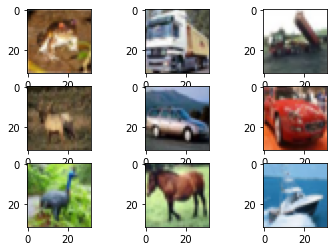

In [ ]:
# some exploratory analysis
# create a grid of 3x3 images (rescaled for better visualisation)
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
 
# show the plot
plt.show()

In [ ]:
#NOTE: 3=RBG (color image)

#assert: if true then execute (ie. testing to see if errors, that is, not the expect # of images + pixel size + color channels)
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

AssertionError: ignored

The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

--- 

## Data preprocessing

It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

We can use a one hot encoding to transform them into a binary matrix in order to best model the classification problem. We know there are 10 classes for this problem, so we can expect the binary matrix to have a width of 10.

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

num_classes

10

In [ ]:
y_test.shape

(10000, 10, 2, 2)

## Model definition and training parameters

In [ ]:
# general model definition and training parameters
epochs = 25
lrate = 0.01
decay = lrate/epochs
batch_size = 64

## Baseline model

Let’s start off by defining a simple CNN structure as a baseline and evaluate how well it performs on the problem.

We will use a structure with two convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions.

Our baseline network structure can be summarized as follows:

* Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a `kernel_initializer` function.
* Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a `kernel_initializer` function.
* Max Pool layer with size 2×2.
* Flatten layer.
* Fully connected layer with 128 units and, a rectifier activation function and a `kernel_initializer` function.
* Fully connected output layer with 10 units and a softmax activation function.

In [ ]:
# Create the baseline model - 1-block VGG architecture
model1 = Sequential()
#NOTE: kernel_initializer helps performance
#two CNN-layers 
#filter: usually a power-of-2 (b/c 2-D image)
model1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
#summarize to 2x2 output
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # changed from 512
model1.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
# Fit the model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
782/782 [==============================] - 16s 7ms/step - loss: 1.4986 - accuracy: 0.4604 - val_loss: 1.1727 - val_accuracy: 0.5758
Epoch 2/25
782/782 [==============================] - 4s 6ms/step - loss: 1.0735 - accuracy: 0.6197 - val_loss: 1.0547 - val_accuracy: 0.6226
Epoch 3/25
782/782 [==============================] - 5s 6ms/step - loss: 0.8968 - accuracy: 0.6826 - val_loss: 0.9735 - val_accuracy: 0.6613
Epoch 4/25
782/782 [==============================] - 4s 6ms/step - loss: 0.7677 - accuracy: 0.7309 - val_loss: 0.9408 - val_accuracy: 0.6736
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 0.6620 - accuracy: 0.7684 - val_loss: 0.9309 - val_accuracy: 0.6834
Epoch 6/25
782/782 [==============================] - 4s 5ms/step - loss: 0.5568 - accuracy: 0.8060 - val_loss: 0.9888 - val_accuracy: 0.6753
Epoch 7/25
782/782 [==============================] - 4s 6ms/step - loss: 0.4596 - accuracy: 0.8419 - val_loss: 1.0121 - val_accuracy: 0.6806
Epoch

In [ ]:
# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 68.00%


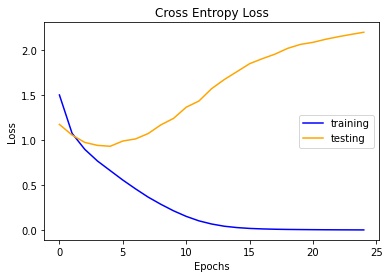

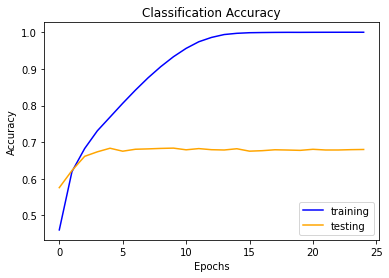

In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Model improvement

We have seen that a simple CNN performs poorly on this complex problem. In this section we look at scaling up the size and complexity of our model.

Let’s design a deep version of the simple CNN above. We can introduce an additional round of convolutions with many more feature maps. We will use the same pattern of Convolutional, Convolutional and Max Pooling layers.

This pattern will be repeated 2 times with 32 and 64 feature maps. The effect be an increasing number of feature maps with a smaller and smaller size given the max pooling layers. Finally an additional Dense layer will be used at the output end of the network in an attempt to better translate the large number feature maps to class values.

We can summarize a new network architecture as follows:

* Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
* Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
* Max Pool layer with size 2×2.
* Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
* Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
* Max Pool layer with size 2×2.
* Flatten layer.
* Fully connected layer with 128 units and a rectifier activation function.
* Fully connected output layer with 10 units and a softmax activation function.

In [ ]:
# Create the model - 2-block VGG architecture
model2 = Sequential()
#VGG Architecture: block 1
model2.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D())

#VGG block 2
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D())

#MLP fully connected dense-layers
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#output layer that is the # of classes needed
model2.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
782/782 [==============================] - 7s 8ms/step - loss: 1.4844 - accuracy: 0.4614 - val_loss: 1.1325 - val_accuracy: 0.5989
Epoch 2/25
782/782 [==============================] - 6s 7ms/step - loss: 1.0099 - accuracy: 0.6433 - val_loss: 0.9750 - val_accuracy: 0.6603
Epoch 3/25
782/782 [==============================] - 6s 7ms/step - loss: 0.8130 - accuracy: 0.7144 - val_loss: 0.8808 - val_accuracy: 0.6967
Epoch 4/25
782/782 [==============================] - 6s 7ms/step - loss: 0.6747 - accuracy: 0.7650 - val_loss: 0.8306 - val_accuracy: 0.7174
Epoch 5/25
782/782 [==============================] - 6s 7ms/step - loss: 0.5600 - accuracy: 0.8035 - val_loss: 0.8117 - val_accuracy: 0.7311
Epoch 6/25
782/782 [==============================] - 6s 7ms/step - loss: 0.4563 - accuracy: 0.8409 - val_loss: 0.8330 - val_accuracy: 0.7298
Epoch 7/25
782/782 [==============================] - 6s 7ms/step - loss: 0.3589 - accuracy: 0.8747 - val_loss: 0.8608 - val_accuracy: 0.7356
Epoch 

In [ ]:
# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.43%


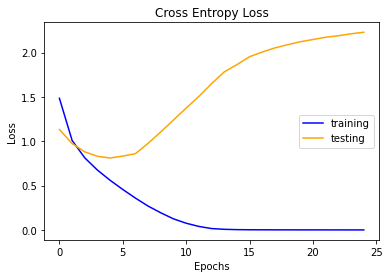

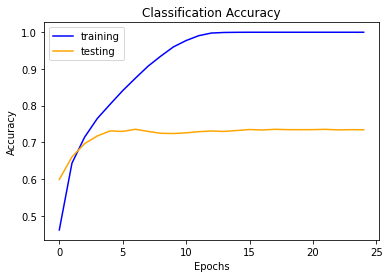

In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# save plot to file
#import sys
#filename = sys.argv[0].split('/')[-1]
#plt.savefig(filename + '_plot.png')
#plt.close()

### (A bit more of) Model improvement

We extend the previous model by adding a third VGG block.

In [ ]:
# Create the model - 3-block VGG architecture
#adding 3rd VGG block

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D())
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D())
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
782/782 [==============================] - 8s 10ms/step - loss: 1.5464 - accuracy: 0.4365 - val_loss: 1.2249 - val_accuracy: 0.5598
Epoch 2/25
782/782 [==============================] - 6s 8ms/step - loss: 1.0870 - accuracy: 0.6137 - val_loss: 0.9981 - val_accuracy: 0.6481
Epoch 3/25
782/782 [==============================] - 7s 8ms/step - loss: 0.8656 - accuracy: 0.6959 - val_loss: 0.8279 - val_accuracy: 0.7145
Epoch 4/25
782/782 [==============================] - 7s 8ms/step - loss: 0.7131 - accuracy: 0.7490 - val_loss: 0.8332 - val_accuracy: 0.7120
Epoch 5/25
782/782 [==============================] - 6s 8ms/step - loss: 0.5886 - accuracy: 0.7922 - val_loss: 0.7753 - val_accuracy: 0.7339
Epoch 6/25
782/782 [==============================] - 6s 8ms/step - loss: 0.4812 - accuracy: 0.8326 - val_loss: 0.8139 - val_accuracy: 0.7357
Epoch 7/25
782/782 [==============================] - 7s 8ms/step - loss: 0.3867 - accuracy: 0.8642 - val_loss: 0.8295 - val_accuracy: 0.7423
Epoch

In [ ]:
# Final evaluation of the model
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.07%


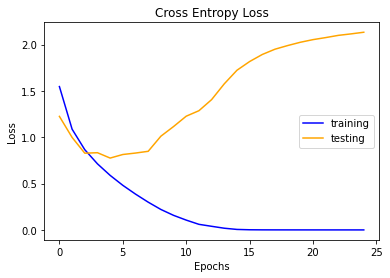

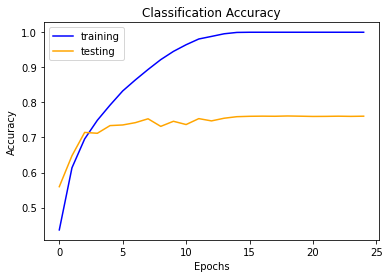

In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Extensions to improve model performance

We have achieved good results on this very difficult problem, but we are still a good way from achieving world class results.

Below are some ideas that you can try to extend upon the models and improve model performance.

* **Regularization**. The first approach would be adding `Dropout` layers to the previous model. You can redesign `model1` and `model2` and add dropout after the first convolutional layer in each block, and also before each dense layer. This should address overfitting and improve models' performance. Another strategy would be **weight decay** (see below).

* **Increase batch sizes**: You can also increase the batch size (currently 64) and check how this influence each model's performance.

* **Train for more epochs**. Each model was trained for a very small number of epochs, 25. It is common to train large convolutional neural networks for hundreds or thousands of epochs. I would expect that performance gains can be achieved by significantly raising the number of training epochs.

* **Image data augmentation**. The objects in the image vary in their position. Another boost in model performance can likely be achieved by using some data augmentation. Methods such as standardization and random shifts and horizontal image flips may be beneficial.

* **Deeper network topology**. The larger network presented is deep, but larger networks could be designed for the problem. This may involve more feature maps closer to the input and perhaps less aggressive pooling. Additionally, standard convolutional network topologies that have been shown useful may be adopted and evaluated on the problem.

---

### 1. Dropout regularization

In [ ]:
#NOTE: adding drop out! (reduce overfitting)

# Create the model
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

### Larger batch size

In [ ]:
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=256)

Epoch 1/25
196/196 [==============================] - 7s 28ms/step - loss: 2.0610 - accuracy: 0.2297 - val_loss: 1.7775 - val_accuracy: 0.3352
Epoch 2/25
196/196 [==============================] - 5s 24ms/step - loss: 1.6861 - accuracy: 0.3768 - val_loss: 1.5965 - val_accuracy: 0.4239
Epoch 3/25
196/196 [==============================] - 5s 24ms/step - loss: 1.4905 - accuracy: 0.4534 - val_loss: 1.3222 - val_accuracy: 0.5186
Epoch 4/25
196/196 [==============================] - 5s 24ms/step - loss: 1.3570 - accuracy: 0.5075 - val_loss: 1.2645 - val_accuracy: 0.5455
Epoch 5/25
196/196 [==============================] - 5s 24ms/step - loss: 1.2491 - accuracy: 0.5506 - val_loss: 1.1639 - val_accuracy: 0.5863
Epoch 6/25
196/196 [==============================] - 5s 26ms/step - loss: 1.1838 - accuracy: 0.5758 - val_loss: 1.1089 - val_accuracy: 0.6100
Epoch 7/25
196/196 [==============================] - 5s 24ms/step - loss: 1.1035 - accuracy: 0.6072 - val_loss: 1.0119 - val_accuracy: 0.6460

In [ ]:
# Final evaluation of the model
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.31%


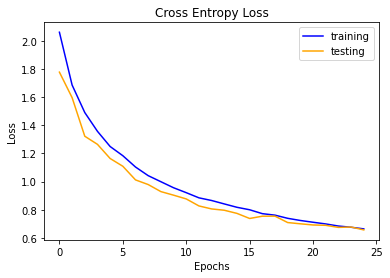

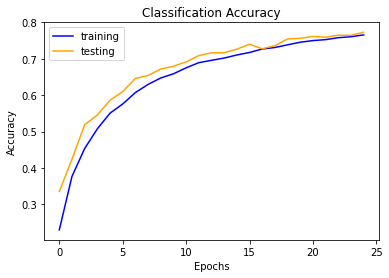

In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Student's activity (self-study)

### Weight decay

Weight regularization or weight decay involves updating the loss function to penalize the model in proportion to the size of the model weights.

This has a regularizing effect, as larger weights result in a more complex and less stable model, whereas smaller weights are often more stable and more general.

We can add weight regularization to the convolutional layers and the fully connected layers by defining the `kernel_regularizer` argument and specifying the type of regularization. In this case, we will use `L2 weight regularization`, the most common type used for neural networks and a sensible default weighting of `0.001`. 

Notice that we are also using a `kernel_initializer` parameter.

```
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
```

In [ ]:
### YOUR CODE HERE
## 1. expand model3 to include kernel_initializer and kernel_regularizer, 
## 2. train the model using the same parameters we have used in the last training, and
## 3. check performance and plot the curves.

from keras.regularizers import l2

# Create the model

# Compile model

model3.summary()

In [ ]:
# Train the model

In [ ]:
# Final evaluation of the model


In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Data augmentation

Data augmentation involves making copies of the examples in the training dataset with small random modifications.

This has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner.

There are many types of data augmentation that could be applied. Given that the dataset is comprised of small photos of objects, we do not want to use augmentation that distorts the images too much, so that useful features in the images can be preserved and used.

The types of random augmentations that could be useful include a horizontal flip, minor shifts of the image, and perhaps small zooming or cropping of the image.

We will investigate the effect of simple augmentation on the baseline image, specifically horizontal flips and 10% shifts in the height and width of the image.

This can be implemented in Keras using the `ImageDataGenerator` class. For example:

In [ ]:
#NOTE: if have not so many pictures, make copies of traning images with slight modification to boost image quantity

from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)

NameError: ignored

During training, we can pass the iterator to the `model.fit_generator()` function and defining the number of batches in a single epoch.

Observe that our model is using **dropout + data augmentation + kernel regularization** (if you manage to complete the missing code in the previous subsection).


In [ ]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=25, validation_data=(X_test, y_test), verbose=2)

In [ ]:
# Final evaluation of the model
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Further improvements

### Variation of Dropout Regularization

Dropout is working very well, so it may be worth investigating variations of how dropout is applied to the model.

One variation that might be interesting is to **increase the amount of dropout from 20% to 25% or 30%**. Another variation that might be interesting is **using a pattern of increasing dropout from 20% for the first block, 30% for the second block, and so on to 50% at the fully connected layer** in the classifier part of the model.

This type of increasing dropout with the depth of the model is a common pattern. It is effective as it forces layers deep in the model to regularize more than layers closer to the input.

In [ ]:
### YOUR CODE HERE
## modify your model to include variation of dropout rates and test again.

# Create the model

# Compile model

model3.summary()


In [ ]:
# Train the model using model.fit() and X_train, y_train data

# If you want to experiment with data augmentation, uncomment the following lines
#steps = int(X_train.shape[0] / 64)
#history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=25, validation_data=(X_test, y_test), verbose=2)

In [ ]:
# Final evaluation of the model


In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Dropout and Data Augmentation and Batch Normalization

We can expand upon the previous example in a few ways.

First, we can **increase the number of training epochs** from 25 to any other numbers (e.g. 100), to give the model more of an opportunity to improve.

Next, we can **add batch normalization** in an effort to stabilize the learning and perhaps accelerate the learning process. This can be done by using the `model.add(BatchNormalization())` layer after each convolutional and dense layers (except the last dense layer). Have a look [here](https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/) for more details.

To offset this acceleration, we can keep the regularization by changing the dropout from a fixed pattern to an increasing pattern.

In [ ]:
### YOUR CODE
## Update your model to include BatchNormalization layers and test again.

#NOTE: BNorm after CNN before Maxpool layer (make data distribution futher spread from 0, so it's easier to differentiate -1, 0, 1)

# Create the model

# Compile model

model3.summary()

In [ ]:
# Train the model using model.fit() and X_train, y_train data


In [ ]:
# Final evaluation of the model


In [ ]:
# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='training')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='training')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Making predcition with your final model

After training and validating your model, you can ask for a prediction.

Here we use a sample image from CIFAR-10 (a Deer, expected class 4) to ask for a prediction.

**Make sure you upload `sample_image.png` to Google Colab**.

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
# load the image
img = load_image('./sample_image.png')
# predict the class
result = model3.predict(img)
# print the result
print(result[0])

## Further improvements to the model

You can experiment some further improvements to your model:

* adding more Dense layers at the end, even increasing the number of units (from 128 to 1024 or 512).
* training for a larger number of epochs.
* experiment with different architectures, other than VGG.